<a href="https://colab.research.google.com/github/Jun-Liu-291/10-Animals/blob/master/Animals_10_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/dataset/tenAnimals_big

!pwd

/content/drive/My Drive/dataset/tenAnimals_big
/content/drive/My Drive/dataset/tenAnimals_big


In [ ]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/dataset/tenAnimals/model/10AnimalsPretrained.h5')

Using TensorFlow backend.


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 256)      

In [ ]:
import os

BASE_PATH = '/content/drive/My Drive/dataset/tenAnimals_big'
TRAIN_PATH = os.path.join(BASE_PATH, 'train')
VAL_PATH = os.path.join(BASE_PATH, 'validation')
TEST_PATH = os.path.join(BASE_PATH, 'test')

batch_size = 128
epochs = 100
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=128,
    class_mode='categorical'
)

Found 2613 images belonging to 10 classes.


In [ ]:
model.evaluate_generator(test_generator)

[0.8286430239677429, 0.8411787152290344]

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate = 1e-4),
              metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
# change callback function
# apply ReduceLRonPlateau for changing LR
reduceLR = ReduceLROnPlateau(
    monitor="loss",
    factor = 0.5,
    patience = 5,
    verbose = 1,
    mode = 'min',
    min_lr = 1e-6)

# save whole model when get a better val accuracy
checkpoint = ModelCheckpoint(
    filepath = '/content/drive/My Drive/dataset/tenAnimals_big/model/10_Animals_f1.{epoch:02d}-{val_loss:.2f}.h5',
    monitor='val_acc',
    save_weights_only = False,
    save_best_only = True
)

my_callbacks = [reduceLR, checkpoint]

In [ ]:
train_image_generator = ImageDataGenerator(
    rescale = 1./ 255,
    rotation_range = 45,
    width_shift_range = .25,
    height_shift_range = .25,
    horizontal_flip = True,
    shear_range=0.2,
    zoom_range = 0.2,
    fill_mode='nearest'
)

validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = TRAIN_PATH,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'categorical'
)

validation_data_gen = validation_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = VAL_PATH,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'categorical'
)

Found 20938 images belonging to 10 classes.
Found 2613 images belonging to 10 classes.


In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(20938/batch_size),
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=int(2613/batch_size),
    callbacks = my_callbacks
)

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 112 could not be retrieved. It could be because a worker has died.
  UserWarning)


  2/163 [..............................] - ETA: 1:41:20 - loss: 0.1463 - acc: 0.9664

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 108 could not be retrieved. It could be because a worker has died.
  UserWarning)


  3/163 [..............................] - ETA: 1:36:01 - loss: 0.1442 - acc: 0.9669

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 96 could not be retrieved. It could be because a worker has died.
  UserWarning)


  4/163 [..............................] - ETA: 1:36:40 - loss: 0.1524 - acc: 0.9639

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 138 could not be retrieved. It could be because a worker has died.
  UserWarning)


  5/163 [..............................] - ETA: 1:34:00 - loss: 0.1644 - acc: 0.9608

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 63 could not be retrieved. It could be because a worker has died.
  UserWarning)


  6/163 [>.............................] - ETA: 1:32:29 - loss: 0.1643 - acc: 0.9598

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 34 could not be retrieved. It could be because a worker has died.
  UserWarning)


  7/163 [>.............................] - ETA: 1:31:09 - loss: 0.1645 - acc: 0.9586

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 150 could not be retrieved. It could be because a worker has died.
  UserWarning)


  9/163 [>.............................] - ETA: 1:28:04 - loss: 0.1591 - acc: 0.9579

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 74 could not be retrieved. It could be because a worker has died.
  UserWarning)


 10/163 [>.............................] - ETA: 1:27:19 - loss: 0.1537 - acc: 0.9587

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 36 could not be retrieved. It could be because a worker has died.
  UserWarning)


 11/163 [=>............................] - ETA: 1:26:27 - loss: 0.1493 - acc: 0.9594

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


 15/163 [=>............................] - ETA: 1:22:17 - loss: 0.1419 - acc: 0.9592

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 143 could not be retrieved. It could be because a worker has died.
  UserWarning)


 16/163 [=>............................] - ETA: 1:21:33 - loss: 0.1398 - acc: 0.9591

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 139 could not be retrieved. It could be because a worker has died.
  UserWarning)


 17/163 [==>...........................] - ETA: 1:21:13 - loss: 0.1388 - acc: 0.9588

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


 18/163 [==>...........................] - ETA: 1:20:40 - loss: 0.1369 - acc: 0.9591

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 156 could not be retrieved. It could be because a worker has died.
  UserWarning)


 19/163 [==>...........................] - ETA: 1:19:57 - loss: 0.1346 - acc: 0.9596

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


 21/163 [==>...........................] - ETA: 1:18:58 - loss: 0.1317 - acc: 0.9598

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 149 could not be retrieved. It could be because a worker has died.
  UserWarning)


 23/163 [===>..........................] - ETA: 1:17:35 - loss: 0.1296 - acc: 0.9602

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 75 could not be retrieved. It could be because a worker has died.
  UserWarning)


 24/163 [===>..........................] - ETA: 1:17:09 - loss: 0.1286 - acc: 0.9603

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 67 could not be retrieved. It could be because a worker has died.
  UserWarning)


 25/163 [===>..........................] - ETA: 1:16:32 - loss: 0.1289 - acc: 0.9599

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


 26/163 [===>..........................] - ETA: 1:16:04 - loss: 0.1277 - acc: 0.9600

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 132 could not be retrieved. It could be because a worker has died.
  UserWarning)


 28/163 [====>.........................] - ETA: 1:14:43 - loss: 0.1256 - acc: 0.9602

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 92 could not be retrieved. It could be because a worker has died.
  UserWarning)


 29/163 [====>.........................] - ETA: 1:14:12 - loss: 0.1240 - acc: 0.9607

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


 30/163 [====>.........................] - ETA: 1:14:05 - loss: 0.1236 - acc: 0.9605

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 106 could not be retrieved. It could be because a worker has died.
  UserWarning)


 31/163 [====>.........................] - ETA: 1:13:54 - loss: 0.1226 - acc: 0.9607

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 102 could not be retrieved. It could be because a worker has died.
  UserWarning)


 37/163 [=====>........................] - ETA: 1:09:32 - loss: 0.1175 - acc: 0.9620

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 39 could not be retrieved. It could be because a worker has died.
  UserWarning)


 38/163 [=====>........................] - ETA: 1:09:29 - loss: 0.1162 - acc: 0.9623

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 127 could not be retrieved. It could be because a worker has died.
  UserWarning)


 39/163 [======>.......................] - ETA: 1:09:08 - loss: 0.1158 - acc: 0.9622

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 104 could not be retrieved. It could be because a worker has died.
  UserWarning)


 40/163 [======>.......................] - ETA: 1:09:39 - loss: 0.1154 - acc: 0.9621

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 79 could not be retrieved. It could be because a worker has died.
  UserWarning)


 41/163 [======>.......................] - ETA: 1:09:00 - loss: 0.1141 - acc: 0.9625

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 154 could not be retrieved. It could be because a worker has died.
  UserWarning)


 42/163 [======>.......................] - ETA: 1:08:24 - loss: 0.1136 - acc: 0.9625

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


 44/163 [=======>......................] - ETA: 1:07:13 - loss: 0.1127 - acc: 0.9625

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 85 could not be retrieved. It could be because a worker has died.
  UserWarning)


 46/163 [=======>......................] - ETA: 1:05:52 - loss: 0.1111 - acc: 0.9630

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


 50/163 [========>.....................] - ETA: 1:03:13 - loss: 0.1091 - acc: 0.9637

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 141 could not be retrieved. It could be because a worker has died.
  UserWarning)


 52/163 [========>.....................] - ETA: 1:01:54 - loss: 0.1085 - acc: 0.9638

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


 53/163 [========>.....................] - ETA: 1:01:18 - loss: 0.1082 - acc: 0.9639

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 46 could not be retrieved. It could be because a worker has died.
  UserWarning)


 57/163 [=========>....................] - ETA: 59:03 - loss: 0.1069 - acc: 0.9640

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 103 could not be retrieved. It could be because a worker has died.
  UserWarning)


 62/163 [==========>...................] - ETA: 55:52 - loss: 0.1053 - acc: 0.9645

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 48 could not be retrieved. It could be because a worker has died.
  UserWarning)


 63/163 [==========>...................] - ETA: 55:17 - loss: 0.1049 - acc: 0.9646

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 136 could not be retrieved. It could be because a worker has died.
  UserWarning)


 65/163 [==========>...................] - ETA: 54:08 - loss: 0.1042 - acc: 0.9648

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 38 could not be retrieved. It could be because a worker has died.
  UserWarning)


 73/163 [============>.................] - ETA: 49:10 - loss: 0.1027 - acc: 0.9651

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


 75/163 [============>.................] - ETA: 48:01 - loss: 0.1020 - acc: 0.9652

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 84 could not be retrieved. It could be because a worker has died.
  UserWarning)


 77/163 [=============>................] - ETA: 47:00 - loss: 0.1014 - acc: 0.9654

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 78/163 [=============>................] - ETA: 46:40 - loss: 0.1011 - acc: 0.9655

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 162 could not be retrieved. It could be because a worker has died.
  UserWarning)


 80/163 [=============>................] - ETA: 45:39 - loss: 0.1008 - acc: 0.9656

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 55 could not be retrieved. It could be because a worker has died.
  UserWarning)


 81/163 [=============>................] - ETA: 45:12 - loss: 0.1006 - acc: 0.9656

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 142 could not be retrieved. It could be because a worker has died.
  UserWarning)


 82/163 [==============>...............] - ETA: 44:38 - loss: 0.1007 - acc: 0.9655

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 124 could not be retrieved. It could be because a worker has died.
  UserWarning)


 86/163 [==============>...............] - ETA: 42:15 - loss: 0.0996 - acc: 0.9659

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


 87/163 [===============>..............] - ETA: 41:43 - loss: 0.0994 - acc: 0.9659

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 77 could not be retrieved. It could be because a worker has died.
  UserWarning)


 88/163 [===============>..............] - ETA: 41:15 - loss: 0.0990 - acc: 0.9660

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


 89/163 [===============>..............] - ETA: 40:44 - loss: 0.0987 - acc: 0.9661

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


 90/163 [===============>..............] - ETA: 40:12 - loss: 0.0985 - acc: 0.9661

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


 91/163 [===============>..............] - ETA: 39:42 - loss: 0.0985 - acc: 0.9661

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 145 could not be retrieved. It could be because a worker has died.
  UserWarning)


 92/163 [===============>..............] - ETA: 39:08 - loss: 0.0981 - acc: 0.9662

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 135 could not be retrieved. It could be because a worker has died.
  UserWarning)


 93/163 [================>.............] - ETA: 38:34 - loss: 0.0980 - acc: 0.9662

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 126 could not be retrieved. It could be because a worker has died.
  UserWarning)


 94/163 [================>.............] - ETA: 38:02 - loss: 0.0977 - acc: 0.9663

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 105 could not be retrieved. It could be because a worker has died.
  UserWarning)


 95/163 [================>.............] - ETA: 37:29 - loss: 0.0976 - acc: 0.9664

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 62 could not be retrieved. It could be because a worker has died.
  UserWarning)


 96/163 [================>.............] - ETA: 36:58 - loss: 0.0972 - acc: 0.9665

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


 97/163 [================>.............] - ETA: 36:24 - loss: 0.0973 - acc: 0.9665

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


 98/163 [=================>............] - ETA: 35:50 - loss: 0.0969 - acc: 0.9666

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 100 could not be retrieved. It could be because a worker has died.
  UserWarning)


 99/163 [=================>............] - ETA: 35:17 - loss: 0.0967 - acc: 0.9666

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 128 could not be retrieved. It could be because a worker has died.
  UserWarning)


100/163 [=================>............] - ETA: 34:55 - loss: 0.0965 - acc: 0.9666

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


102/163 [=================>............] - ETA: 33:48 - loss: 0.0961 - acc: 0.9667

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 144 could not be retrieved. It could be because a worker has died.
  UserWarning)


104/163 [==================>...........] - ETA: 32:44 - loss: 0.0961 - acc: 0.9667

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 88 could not be retrieved. It could be because a worker has died.
  UserWarning)


106/163 [==================>...........] - ETA: 31:36 - loss: 0.0957 - acc: 0.9668

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 82 could not be retrieved. It could be because a worker has died.
  UserWarning)


107/163 [==================>...........] - ETA: 31:02 - loss: 0.0957 - acc: 0.9668

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 42 could not be retrieved. It could be because a worker has died.
  UserWarning)


108/163 [==================>...........] - ETA: 30:29 - loss: 0.0956 - acc: 0.9668

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 43 could not be retrieved. It could be because a worker has died.
  UserWarning)


109/163 [===================>..........] - ETA: 29:56 - loss: 0.0954 - acc: 0.9668

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 71 could not be retrieved. It could be because a worker has died.
  UserWarning)


110/163 [===================>..........] - ETA: 29:24 - loss: 0.0953 - acc: 0.9668

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 52 could not be retrieved. It could be because a worker has died.
  UserWarning)


111/163 [===================>..........] - ETA: 28:53 - loss: 0.0954 - acc: 0.9668

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 68 could not be retrieved. It could be because a worker has died.
  UserWarning)


112/163 [===================>..........] - ETA: 28:21 - loss: 0.0951 - acc: 0.9669

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


113/163 [===================>..........] - ETA: 27:48 - loss: 0.0951 - acc: 0.9669

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 81 could not be retrieved. It could be because a worker has died.
  UserWarning)


116/163 [====================>.........] - ETA: 26:00 - loss: 0.0946 - acc: 0.9669

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 119 could not be retrieved. It could be because a worker has died.
  UserWarning)


117/163 [====================>.........] - ETA: 25:28 - loss: 0.0945 - acc: 0.9669

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


119/163 [====================>.........] - ETA: 24:20 - loss: 0.0945 - acc: 0.9669

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 61 could not be retrieved. It could be because a worker has died.
  UserWarning)


120/163 [=====================>........] - ETA: 23:47 - loss: 0.0944 - acc: 0.9670

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 137 could not be retrieved. It could be because a worker has died.
  UserWarning)


121/163 [=====================>........] - ETA: 23:14 - loss: 0.0945 - acc: 0.9669

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


123/163 [=====================>........] - ETA: 22:07 - loss: 0.0942 - acc: 0.9670

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 107 could not be retrieved. It could be because a worker has died.
  UserWarning)


133/163 [=======================>......] - ETA: 16:28 - loss: 0.0935 - acc: 0.9671

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 151 could not be retrieved. It could be because a worker has died.
  UserWarning)


134/163 [=======================>......] - ETA: 15:55 - loss: 0.0934 - acc: 0.9671

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 51 could not be retrieved. It could be because a worker has died.
  UserWarning)


137/163 [========================>.....] - ETA: 14:15 - loss: 0.0935 - acc: 0.9670

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 94 could not be retrieved. It could be because a worker has died.
  UserWarning)


138/163 [========================>.....] - ETA: 13:42 - loss: 0.0933 - acc: 0.9671

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 130 could not be retrieved. It could be because a worker has died.
  UserWarning)


140/163 [========================>.....] - ETA: 12:36 - loss: 0.0931 - acc: 0.9672

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 99 could not be retrieved. It could be because a worker has died.
  UserWarning)


141/163 [========================>.....] - ETA: 12:03 - loss: 0.0929 - acc: 0.9672

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 160 could not be retrieved. It could be because a worker has died.
  UserWarning)


142/163 [=========================>....] - ETA: 11:30 - loss: 0.0929 - acc: 0.9672

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 111 could not be retrieved. It could be because a worker has died.
  UserWarning)


146/163 [=========================>....] - ETA: 9:17 - loss: 0.0925 - acc: 0.9673

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 89 could not be retrieved. It could be because a worker has died.
  UserWarning)


147/163 [==========================>...] - ETA: 8:44 - loss: 0.0924 - acc: 0.9674

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


148/163 [==========================>...] - ETA: 8:12 - loss: 0.0924 - acc: 0.9674

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 56 could not be retrieved. It could be because a worker has died.
  UserWarning)


149/163 [==========================>...] - ETA: 7:40 - loss: 0.0924 - acc: 0.9673

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 58 could not be retrieved. It could be because a worker has died.
  UserWarning)


151/163 [==========================>...] - ETA: 6:34 - loss: 0.0925 - acc: 0.9673

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 59 could not be retrieved. It could be because a worker has died.
  UserWarning)


154/163 [===========================>..] - ETA: 4:54 - loss: 0.0922 - acc: 0.9673

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 80 could not be retrieved. It could be because a worker has died.
  UserWarning)


155/163 [===========================>..] - ETA: 4:22 - loss: 0.0921 - acc: 0.9674

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 95 could not be retrieved. It could be because a worker has died.
  UserWarning)


157/163 [===========================>..] - ETA: 3:16 - loss: 0.0919 - acc: 0.9674

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


158/163 [============================>.] - ETA: 2:43 - loss: 0.0917 - acc: 0.9675

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 131 could not be retrieved. It could be because a worker has died.
  UserWarning)


161/163 [============================>.] - ETA: 1:05 - loss: 0.0914 - acc: 0.9676

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 64 could not be retrieved. It could be because a worker has died.
  UserWarning)


162/163 [============================>.] - ETA: 32s - loss: 0.0913 - acc: 0.9676 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


163/163 [==============================] - 5637s 35s/step - loss: 0.0912 - acc: 0.9677 - val_loss: 0.1281 - val_acc: 0.9677
Epoch 2/100
163/163 [==============================] - 234s 1s/step - loss: 0.0792 - acc: 0.9711 - val_loss: 0.0621 - val_acc: 0.9722
Epoch 3/100
163/163 [==============================] - 239s 1s/step - loss: 0.0757 - acc: 0.9722 - val_loss: 0.0612 - val_acc: 0.9724
Epoch 4/100
163/163 [==============================] - 233s 1s/step - loss: 0.0706 - acc: 0.9741 - val_loss: 0.1065 - val_acc: 0.9686
Epoch 5/100
163/163 [==============================] - 229s 1s/step - loss: 0.0684 - acc: 0.9751 - val_loss: 0.0702 - val_acc: 0.9680
Epoch 6/100
163/163 [==============================] - 231s 1s/step - loss: 0.0642 - acc: 0.9760 - val_loss: 0.0652 - val_acc: 0.9748
Epoch 7/100
163/163 [==============================] - 234s 1s/step - loss: 0.0620 - acc: 0.9773 - val_loss: 0.1017 - val_acc: 0.9711
Epoch 8/100
163/163 [==============================] - 236s 1s/step - lo

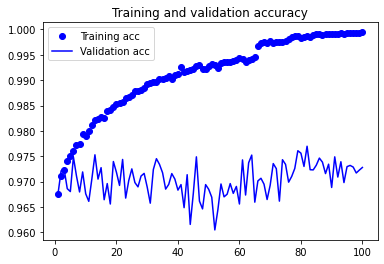

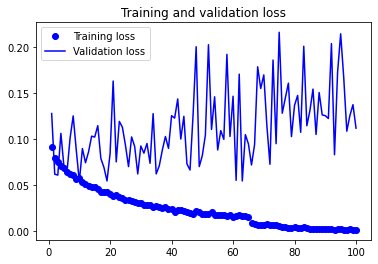

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/My Drive/dataset/tenAnimals_big/model/10Animals_temp1.h5')

In [ ]:
model.evaluate_generator(test_generator)

[0.11890729516744614, 0.9726369380950928]